In [5]:
# !pip install opendatasets --quiet
# import opendatasets as od
# dataset_url = 'https://www.kaggle.com/datasets/mssmartypants/rice-type-classification'
# od.download(dataset_url)

In [6]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset,DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [8]:
data_df=pd.read_csv("/content/riceClassification.csv")
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [10]:
data_df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [11]:
data_df.dropna(inplace=True)
data_df.drop(["id"],axis=1,inplace=True)


In [12]:
data_df.shape

(18185, 11)

In [13]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [14]:
data_df.Class.unique()

array([1, 0])

In [15]:
data_df.Class.value_counts()

,count
Class,
1,9985
0,8200


In [16]:
originaldf=data_df.copy()


In [17]:
for column in data_df.columns:
  data_df[column]=data_df[column]/data_df[column].abs().max()
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


Normalized values

In [18]:
X=np.array(data_df.iloc[:,:-1]) #Taking all rows,columns,except last one(Class) since it is target
y=np.array(data_df.iloc[:,-1])

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [20]:
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)

In [21]:
X_train.shape,X_test.shape,X_val.shape

((12729, 10), (2728, 10), (2728, 10))

In [27]:
class dataset(Dataset):
  def __init__(self,X,Y):
    self.X=torch.tensor(X,dtype=torch.float32).to(device)
    self.Y=torch.tensor(Y,dtype=torch.float32).to(device)
  def __len__(self):
    return len(self.X)
  def __getitem__(self,index):
    return self.X[index],self.Y[index]



In [28]:
training_data=dataset(X_train,y_train)
validation_data=dataset(X_val,y_val)
testing_data=dataset(X_test,y_test)


In [29]:
train_dataloader=DataLoader(training_data,batch_size=8,shuffle=True)
val_dataloader=DataLoader(validation_data,batch_size=8,shuffle=False)
test_dataloader=DataLoader(testing_data,batch_size=8,shuffle=False)

In [66]:
Hidden_Neurons=10
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.input_layer=nn.Linear(X.shape[1],out_features=Hidden_Neurons)
    self.linear=nn.Linear(Hidden_Neurons,out_features=1)
    self.sigmoid=nn.Sigmoid()
  def forward(self,x):
    x=self.input_layer(x)
    x=self.linear(x)
    x=self.sigmoid(x)
    return x
model=MyModel().to(device)
model.state_dict()

OrderedDict([('input_layer.weight',
              tensor([[-0.0332,  0.3017,  0.0520,  0.1062,  0.1922, -0.0385, -0.1209, -0.1915,
                        0.0716,  0.2931],
                      [-0.0764,  0.0112, -0.0870,  0.2597, -0.2257,  0.0361,  0.0233,  0.0308,
                       -0.2392, -0.0100],
                      [-0.0458,  0.0771,  0.0492,  0.1550, -0.2230, -0.1371,  0.2293, -0.2853,
                        0.2959, -0.2312],
                      [ 0.1612,  0.1323, -0.2049,  0.1885,  0.0411,  0.0990, -0.2356,  0.2999,
                       -0.2519, -0.1472],
                      [ 0.3161, -0.1970, -0.2341,  0.2749,  0.0319, -0.0882,  0.1126, -0.2994,
                       -0.0394, -0.0065],
                      [-0.2190, -0.1925, -0.2235, -0.1498, -0.1139, -0.0420,  0.1741, -0.1819,
                        0.2722,  0.2683],
                      [ 0.3011,  0.2996,  0.1343,  0.2159, -0.2785,  0.1390,  0.2954, -0.1912,
                        0.0641, -0.1895],
     

In [34]:
summary(model,(X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [67]:
criterion=nn.BCELoss()
optimizer=Adam(model.parameters(),lr=1e-3)

In [68]:
total_loss_train_plot=[]
total_loss_validation_plot=[]
total_accuracy_train_plot=[]
total_accuracy_validation_plot=[]

epochs=10
for epoch in range(epochs):
  total_acc_train=0
  total_loss_train=0
  total_acc_val=0
  total_loss_val=0
  for data in train_dataloader:
    inputs,labels=data
    prediction=model(inputs).squeeze(1)
    batch_loss=criterion(prediction,labels)
    total_loss_train+=batch_loss.item()
    acc=((prediction).round()==labels).sum().item()
    total_acc_train+=acc
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  with torch.no_grad():
    for data in val_dataloader:
      inputs,labels=data
      prediction=model(inputs).squeeze(1)
      batch_loss=criterion(prediction,labels)
      total_loss_val+=batch_loss.item()
      total_acc_val+=((prediction).round()==labels).sum().item()
    total_loss_train_plot.append(round(total_loss_train/1000, 4))
    total_loss_validation_plot.append(round(total_loss_val/1000, 4))
    total_accuracy_train_plot.append(round(total_acc_train/training_data.__len__()*100, 4))
    total_accuracy_validation_plot.append(round(total_acc_val/(validation_data.__len__())*100, 4))
  print(f'''Epoch no:{epoch+1}  Train Loss:{round((total_loss_train/1000),4)} Train Accuracy: {(total_acc_train/(training_data.__len__())*100)}
        Validation Loss:{round((total_loss_val/1000),4)} Validation Accuracy:{total_acc_val/(validation_data.__len__())*100}''')
  print("===="*25)


Epoch no:1  Train Loss:0.6089 Train Accuracy: 92.4817346217299
        Validation Loss:0.0473 Validation Accuracy:97.25073313782991
Epoch no:2  Train Loss:0.1344 Train Accuracy: 98.51520150836673
        Validation Loss:0.022 Validation Accuracy:98.60703812316716
Epoch no:3  Train Loss:0.0844 Train Accuracy: 98.57019404509388
        Validation Loss:0.0177 Validation Accuracy:98.79032258064517
Epoch no:4  Train Loss:0.0727 Train Accuracy: 98.5780501217692
        Validation Loss:0.0158 Validation Accuracy:98.71700879765396
Epoch no:5  Train Loss:0.0688 Train Accuracy: 98.61733050514573
        Validation Loss:0.0152 Validation Accuracy:98.71700879765396
Epoch no:6  Train Loss:0.0669 Train Accuracy: 98.63304265849635
        Validation Loss:0.0162 Validation Accuracy:98.49706744868035
Epoch no:7  Train Loss:0.0671 Train Accuracy: 98.64875481184696
        Validation Loss:0.0152 Validation Accuracy:98.53372434017595
Epoch no:8  Train Loss:0.0662 Train Accuracy: 98.60947442847042
        

In [69]:

with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in test_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss_test = criterion((prediction), labels)
    total_loss_test += batch_loss_test.item()
    acc = ((prediction).round() == labels).sum().item()
    total_acc_test += acc

print(f"Accuracy Score is: {round((total_acc_test/X_test.shape[0])*100, 2)}%")


Accuracy Score is: 98.57%


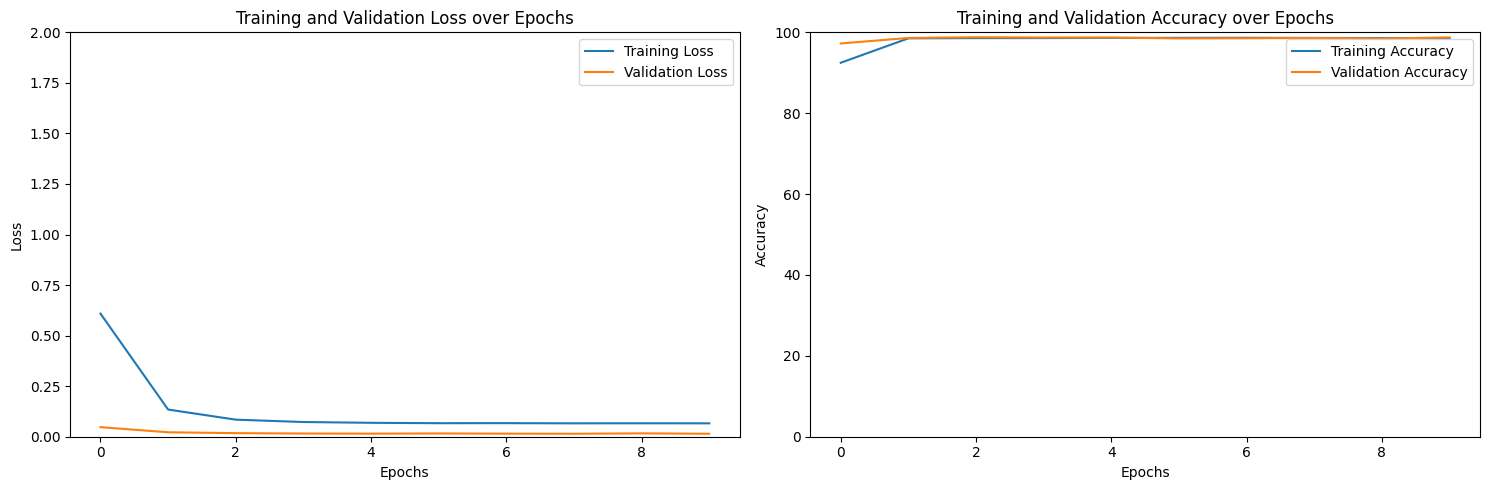

In [70]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].plot(total_loss_train_plot, label='Training Loss')
axs[0].plot(total_loss_validation_plot, label='Validation Loss')
axs[0].set_title('Training and Validation Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0, 2])
axs[0].legend()

axs[1].plot(total_accuracy_train_plot, label='Training Accuracy')
axs[1].plot(total_accuracy_validation_plot, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim([0, 100])
axs[1].legend()

plt.tight_layout()


In [73]:
originaldf

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [76]:
originaldf.head(1)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.76451,1.440796,1


In [77]:
area = float(input("Area: "))/originaldf['Area'].abs().max()
MajorAxisLength = float(input("Major Axis Length: "))/originaldf['MajorAxisLength'].abs().max()
MinorAxisLength = float(input("Minor Axis Length: "))/originaldf['MinorAxisLength'].abs().max()
Eccentricity = float(input("Eccentricity: "))/originaldf['Eccentricity'].abs().max()
ConvexArea = float(input("Convex Area: "))/originaldf['ConvexArea'].abs().max()
EquivDiameter = float(input("EquivDiameter: "))/originaldf['EquivDiameter'].abs().max()
Extent = float(input("Extent: "))/originaldf['Extent'].abs().max()
Perimeter = float(input("Perimeter: "))/originaldf['Perimeter'].abs().max()
Roundness = float(input("Roundness: "))/originaldf['Roundness'].abs().max()
AspectRation = float(input("AspectRation: "))/originaldf['AspectRation'].abs().max()

my_inputs = [area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation]

print("="*20)
model_inputs = torch.Tensor(my_inputs).to(device)
prediction = (model(model_inputs))
print(prediction)
print("Class is: ", round(prediction.item()))


Area: 4537
Major Axis Length: 92.2
Minor Axis Length: 65
Eccentricity: 0.71
Convex Area: 4677
EquivDiameter: 76
Extent: 0.65
Perimeter: 274
Roundness: 0.765
AspectRation: 1.45
tensor([0.0046], device='cuda:0', grad_fn=<SigmoidBackward0>)
Class is:  0
